In [1]:
from pprint import pprint

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

from GamerVis import *

In [2]:
%matplotlib inline

## Methods for visualizing the data

This document demonstrates how to use gamervis to visualize the simulation data.

Current supports:
- `plot_centquant()`
  - Plot the temporal evolution of quantities recorded in `Record__CentralQuant`.
- `plot_gw()`
  - Plot the temporal evolution of the GW strains and spectrograms, and the amplitude spectral density (ASD).
- `plot_slice()`
  - Create a slice plot, wrapping the `yt.SlicePlot()` function.
- `plot_densfluct()`
  - Plot the density fluctuation on the XY-plane for analyzing the low-T/|W| instability.

In [3]:
# setting
rundir  = "/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot00/MHM_AngMax00_AngMin12_B0_Rot0_re4"
tbounce = 4.5865000e-01
fnidx = 124

gamer_obj = gamervis(rundir = rundir, tbounce = tbounce)

## plot_centquant()

In [4]:
gamer_obj.plot_centquant?

Signature:
gamer_obj.plot_centquant(
    field,
    tbounce=None,
    weight='V',
    axes=None,
    savefig=False,
    fnout_prefix='CCSN',
    path_fnout='.',
    **kwargs_plt,
)
Docstring:
Visualize the evolution of quantities recorded in Record__CentralQuant,
where time is displayed in milliseconds.

Parameters
----------
field: string
    Name of target field.
    --> "dens"  : peak density.
        "ye"    : electron fraction associated with the highest-density cell.
        "rsh"   : minimum, average, and maximum shock radius.
        "lum_nu": neutrino luminosity
tbounce: float, optional
    Physical time of core bounce, in second.
weight: string, optional
    Weighting method of the mean shock radius to be displayed.
    --> "V"   : cell volume.
        "Vinv": inverse cell volume.
axes: Matplotlib axes object, optional
    Axes object for plotting the data.
savefig: boolean, optional
    Flag indicating whether to save the figure.
fnout_prefix: string, optional
    Prefix for

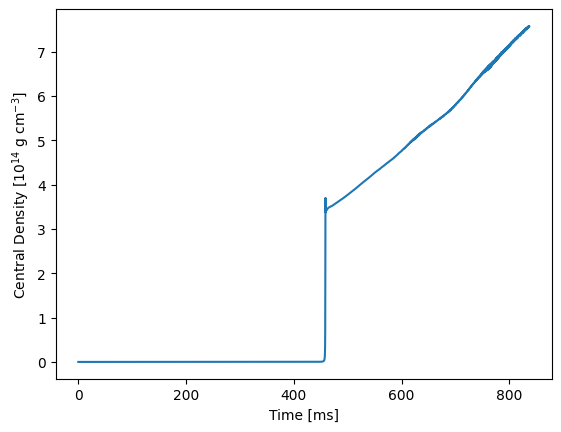

In [5]:
gamer_obj.plot_centquant("dens")

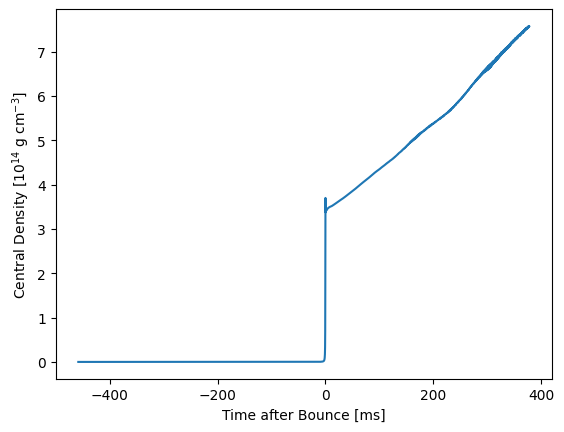

In [6]:
# set `tbounce` to "auto" to shift the time
gamer_obj.plot_centquant("dens", tbounce = "auto")

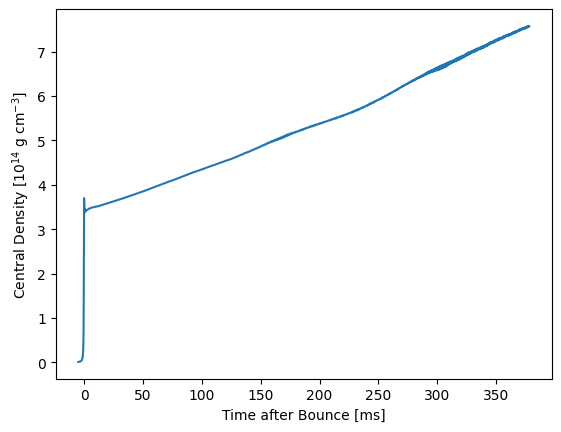

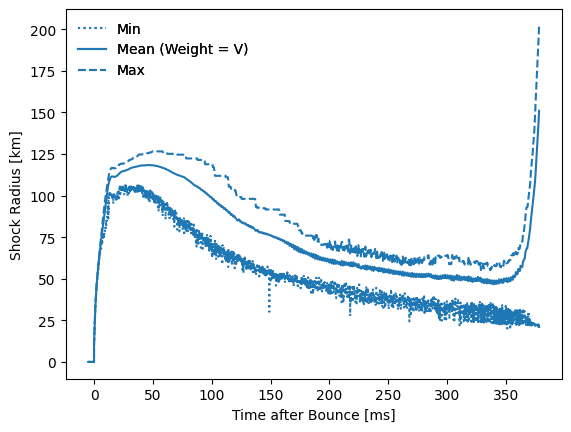

In [7]:
# set `xlim` to tune the x coordinate
xlim = [-0.005, None]  # in second

gamer_obj.plot_centquant("dens", tbounce = "auto", xlim = xlim)
gamer_obj.plot_centquant("rsh", tbounce = "auto", xlim = xlim)

### advanced techniques

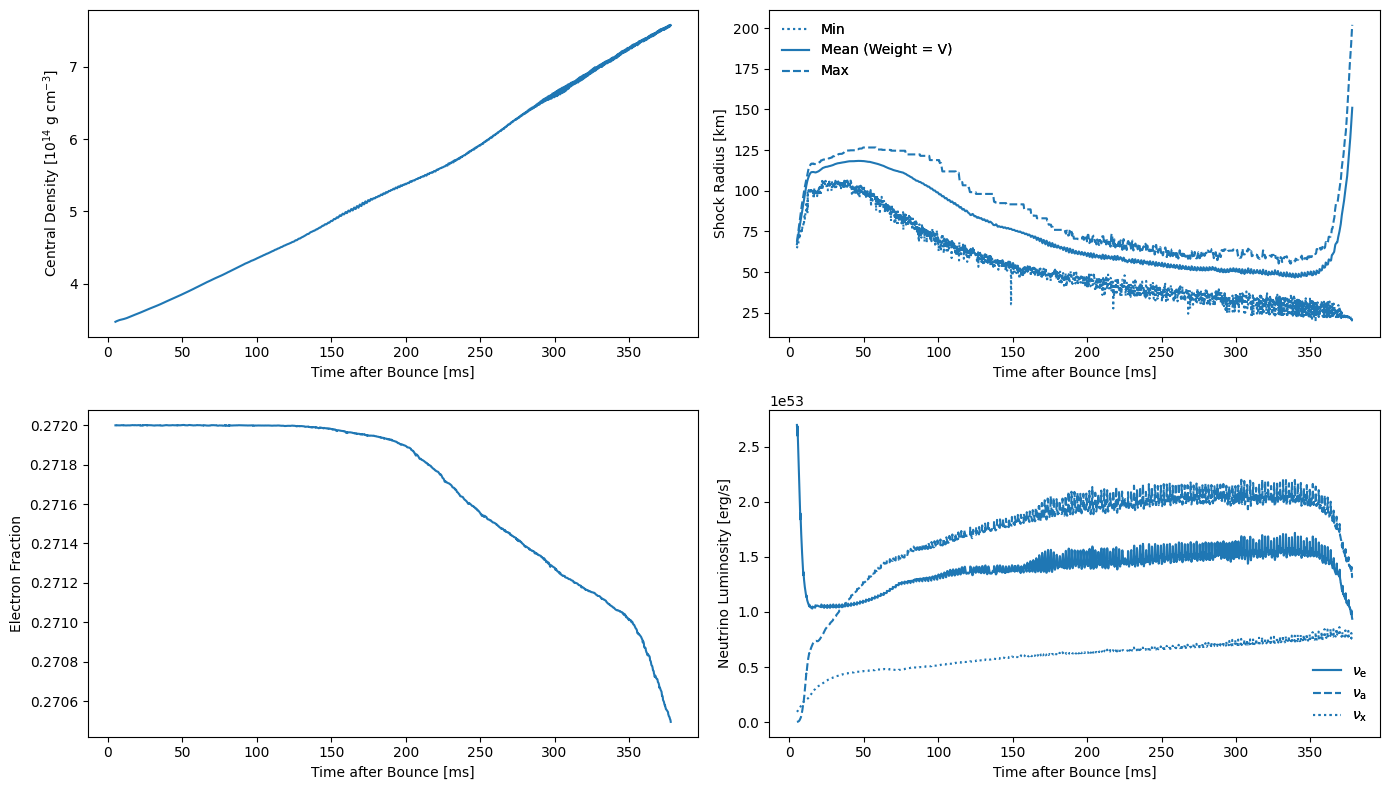

In [8]:
### plot multiple quantities in one figure
fig, axes = plt.subplots(figsize = (14, 8), nrows = 2, ncols = 2)

field_list = "dens", "rsh", "ye", "lum_nu"
axes_ravel = axes.ravel()

xlim = [0.005, None]

for field, ax in zip(field_list, axes_ravel):
    gamer_obj.plot_centquant(field, tbounce = "auto", xlim = xlim, axes = ax)

fig.tight_layout()

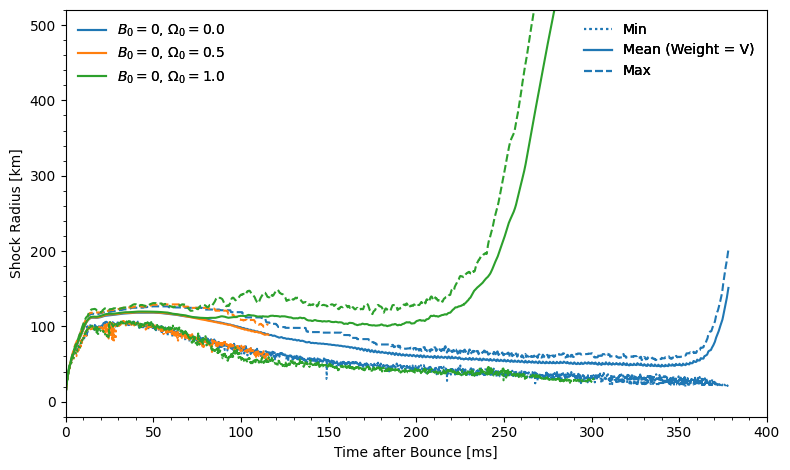

In [9]:
### show multiple simulations simultaneously
# setting
rundir_list = ("/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot00/MHM_AngMax00_AngMin12_B0_Rot0_re4",
               "/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot05/MHM_AngMax00_AngMin12_B00_Rot05_re1_libyt",
               "/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot10/MHM_AngMax00_AngMin12_B0_Rot10_re6_150km")
tbounce_list = 4.5865000e-01, 4.6115000e-01, 4.6881000e-01
label_list = (r"$B_0 = 0$, $\Omega_0 = 0.0$",
              r"$B_0 = 0$, $\Omega_0 = 0.5$",
              r"$B_0 = 0$, $\Omega_0 = 1.0$")

# create the figure object manually
fig, axes = plt.subplots(figsize = (8, 4.8))

for rundir, tbounce, label in zip(rundir_list, tbounce_list, label_list):
    obj = gamervis(rundir, tbounce)

    obj.plot_centquant("rsh", tbounce = "auto", axes = axes, label = label)

axes.set_xlim(0, 400)
axes.set_ylim(-20, 520.0)

# handle the legend
lines = axes.get_lines()

line_1  = lines[1::3]
legend  = plt.legend(line_1, label_list, loc = "upper left", framealpha = 0)
axes.add_artist(legend)
axes.minorticks_on()

fig.tight_layout()

## plot_gw()

In [10]:
gamer_obj.plot_gw?

Signature:
gamer_obj.plot_gw(
    figtype,
    phi,
    theta,
    gw_mode='plus',
    dist=10.0,
    fs=None,
    time_window=None,
    time_window_ref='bounce',
    kwargs_strain=None,
    kwargs_spect=None,
    kwargs_asd=None,
    kwargs_plt=None,
    axes=None,
    savefig=False,
    fnout_prefix='GW',
    path_fnout='.',
)
Docstring:
Visualize different characteristics of GW emissions,
including GW strains, spectrograms, and amplitude spectral density.

Parameters
----------
figtype: string
    Type of the generated figure.
    --> "strain"     : GW strains.
        "spectrogram": spectrogram of GW emissions.
        "asd"        : amplitude spectral density.
phi: float
    Azimuthal angle of the observations, in radians.
theta: float
    Polar angle of the observations, in radians.
gw_mode: string, optional
    Component of GW emissions to be displayed.
    --> "plus" : plus mode.
        "cross": cross mode.
        "both" : L2 norm of the plus and cross modes.
dist: float, opt

In [11]:
# setting
phi     = 0.0
theta   = 0.5 * np.pi
gw_mode = "plus"

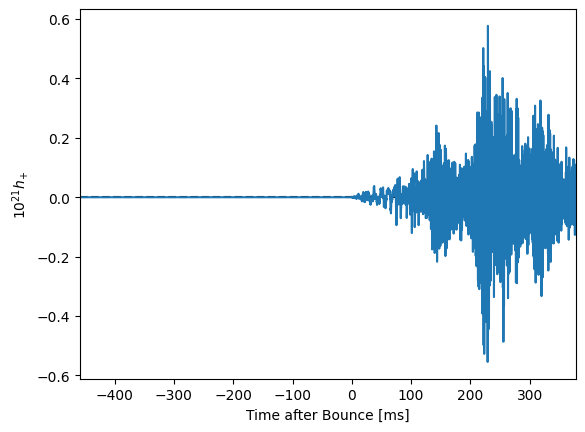

In [12]:
# temporal evolution of strain
gamer_obj.plot_gw("strain", phi = phi, theta = theta)

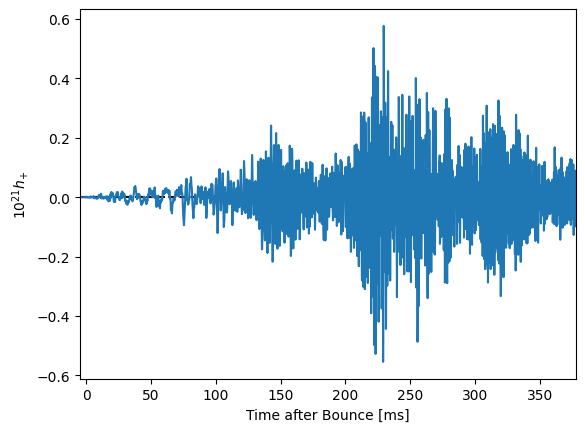

In [13]:
# use `time_window` and `time_window_ref` (defaults to `bounce`) to select the data
time_window = [-0.005, None]

gamer_obj.plot_gw("strain", phi = phi, theta = theta, time_window = time_window)

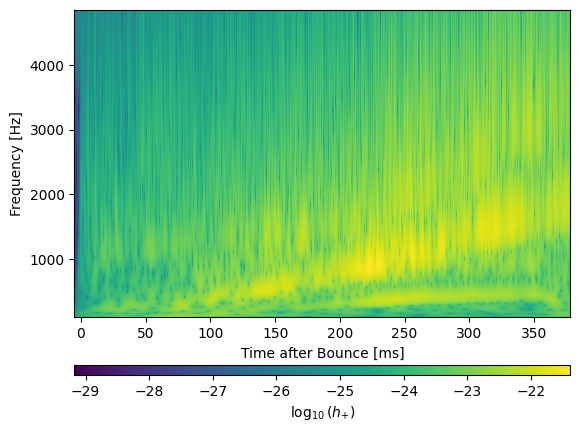

In [14]:
# temporal evolutionof spectrogram
time_window = [-0.005, None]

gamer_obj.plot_gw("spectrogram", phi = phi, theta = theta, time_window = time_window)

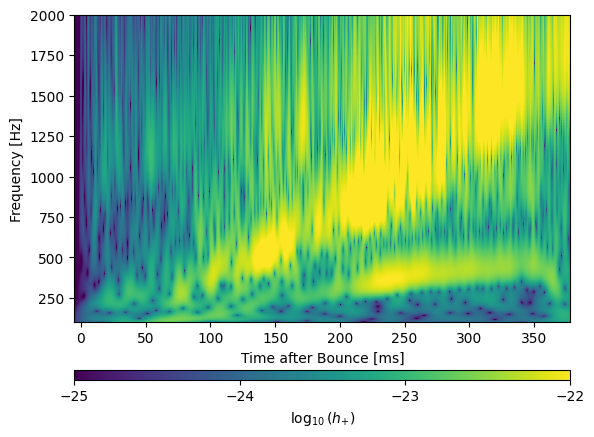

In [15]:
# use `vmin` and `vmax` to change the range of colorbar
# use `fmin` and `fmax` to change the range of y-axis
time_window = [-0.005, None]
kwargs_spect = {"vmin": 1e-25,
                "vmax": 1e-22,
                "fmax": 2000}

gamer_obj.plot_gw("spectrogram", phi = phi, theta = theta, time_window = time_window, kwargs_spect = kwargs_spect)

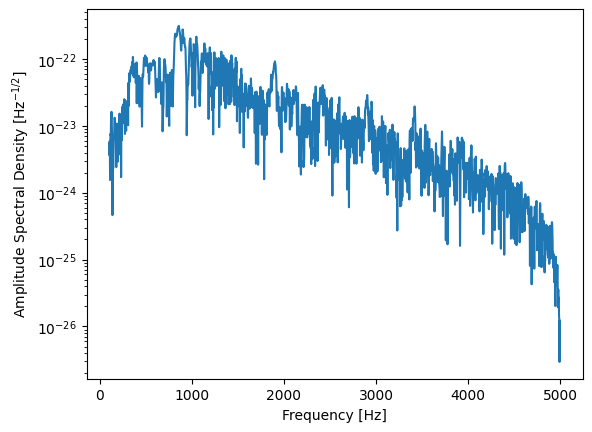

In [16]:
# amplitude spectral density
time_window = [-0.005, None]

gamer_obj.plot_gw("asd", phi = phi, theta = theta, time_window = time_window)

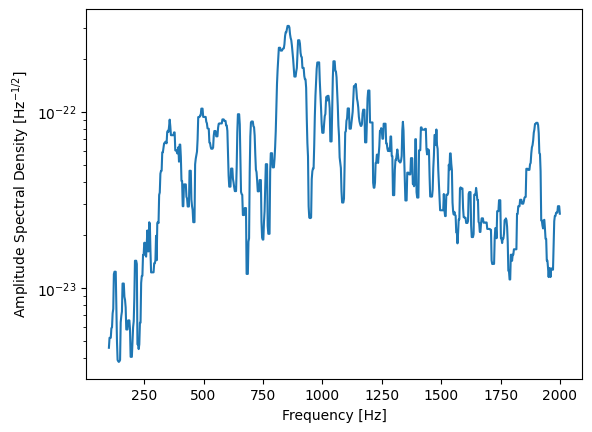

In [17]:
# use `fmin` and `fmax` to change the range of x-axis
# set `num_ave` to smooth the asd
time_window = [-0.005, None]
kwargs_asd = {"fmax": 2000,
              "num_ave": 5}

gamer_obj.plot_gw("asd", phi = phi, theta = theta, time_window = time_window, kwargs_asd = kwargs_asd)

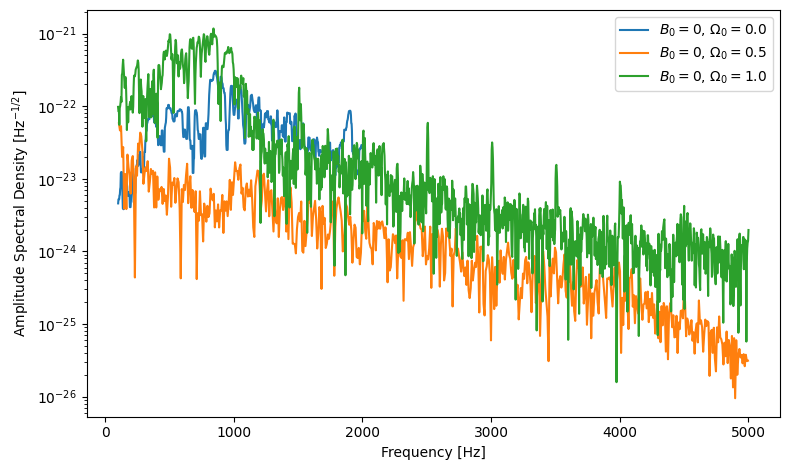

In [18]:
### show multiple simulations simultaneously
# setting
rundir_list = ("/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot00/MHM_AngMax00_AngMin12_B0_Rot0_re4",
               "/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot05/MHM_AngMax00_AngMin12_B00_Rot05_re1_libyt",
               "/home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot10/MHM_AngMax00_AngMin12_B0_Rot10_re6_150km")
tbounce_list = 4.5865000e-01, 4.6115000e-01, 4.6881000e-01
label_list = (r"$B_0 = 0$, $\Omega_0 = 0.0$",
              r"$B_0 = 0$, $\Omega_0 = 0.5$",
              r"$B_0 = 0$, $\Omega_0 = 1.0$")

time_window = [-0.005, None]
kwargs_asd = {"fmax": 2000,
              "num_ave": 5}

# create the figure object manually
fig, axes = plt.subplots(figsize = (8, 4.8))

for rundir, tbounce, label in zip(rundir_list, tbounce_list, label_list):
    obj = gamervis(rundir, tbounce)

    obj.plot_gw("asd", phi = phi, theta = theta, time_window = time_window, kwargs_asd = kwargs_asd,
                axes = axes, kwargs_plt = {"label": label})

axes.legend()
fig.tight_layout()

## plot_slice()

In [19]:
gamer_obj.plot_slice?

Signature:
gamer_obj.plot_slice(
    fn_list,
    fields,
    direction,
    center='pns_ascii',
    tbounce=None,
    tstart=None,
    lim=None,
    logscale=None,
    show_grid=False,
    auto_scale=False,
    zoom=1.0,
    zoom_max=None,
    zoom_auto=False,
    zoom_auto_runmin=False,
    roi_cond=None,
    fontsize=None,
    fnout_prefix='SlicePlot',
    path_fnout='.',
    **kwargs,
)
Docstring:
Create a slice plot of the simulation data from HDF5 snapshots,
wrapping the yt.SlicePlot() function.

Parameters
----------
fn_list: array-like of integer/string
    Path to HDF5 snapshots or their indices to be processed.
    --> Can be "Data_000010", "10", or 10.
        Use "all" to automatically retrieve all available HDF5 files.
fields: string or array-like of string
    Name of target fields.
direction: string
    Direction of the slice plots.
center: string or array-like of float, optional
    Coordinate of reference center, in cm.
    --> "c"        : center of the simulation dom

Processing /home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot00/MHM_AngMax00_AngMin12_B0_Rot0_re4/Data_000124


yt : [INFO     ] 2025-04-22 07:52:33,775 Parameters: current_time              = 686.0
yt : [INFO     ] 2025-04-22 07:52:33,775 Parameters: domain_dimensions         = [160 160 160]
yt : [INFO     ] 2025-04-22 07:52:33,776 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-04-22 07:52:33,776 Parameters: domain_right_edge         = [20000. 20000. 20000.]
yt : [INFO     ] 2025-04-22 07:52:33,777 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-04-22 07:52:36,755 xlim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:36,756 ylim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:36,758 xlim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:36,759 ylim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:36,762 Making a fixed resolution buffer of (('gamer', 'Entr')) 800 by 800
yt : [INFO     ] 2025-04-22 07:52:37,422 Saving plot ./SlicePlot_Entr_z_000124.png


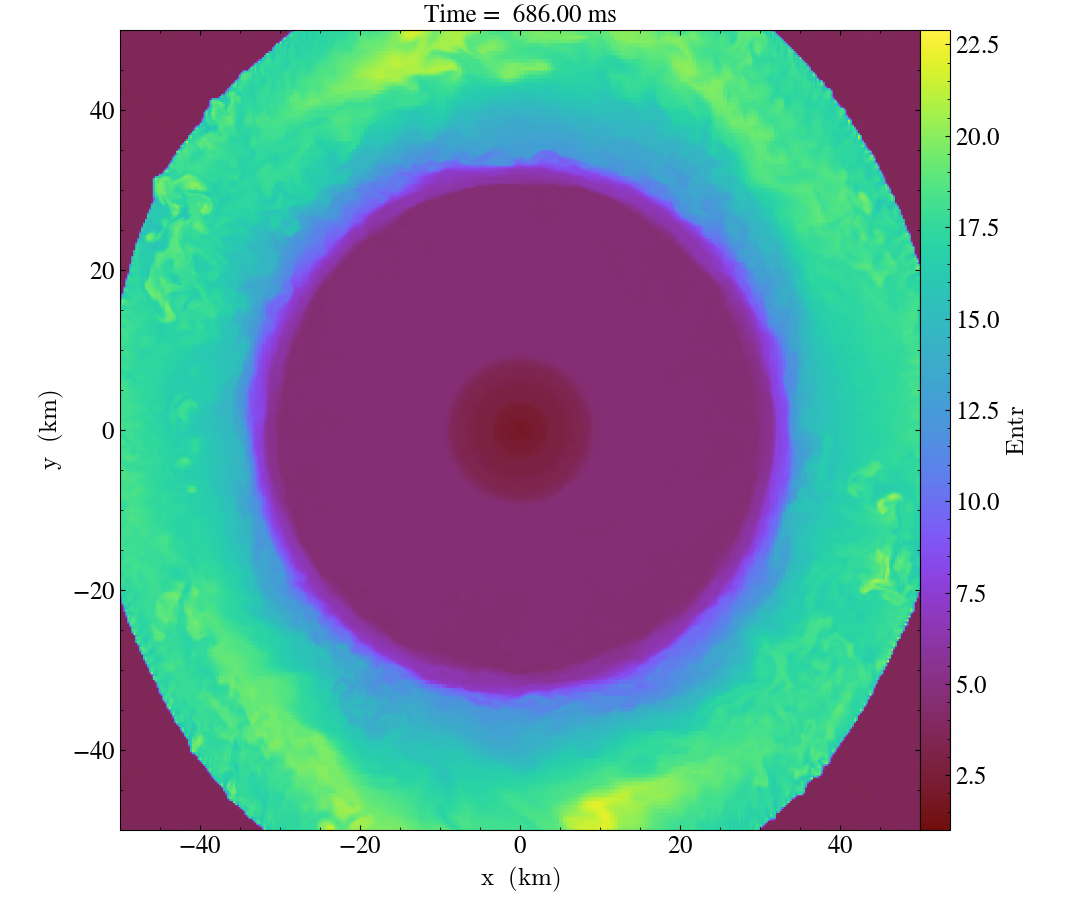

In [20]:
gamer_obj.plot_slice(fnidx, "Entr", "z", logscale = False, zoom = 200, lim = (1, None))
Image(filename = "SlicePlot_Entr_z_000124.png", width = 400, height = 400)

Processing /home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot00/MHM_AngMax00_AngMin12_B0_Rot0_re4/Data_000124


yt : [INFO     ] 2025-04-22 07:52:38,820 Parameters: current_time              = 686.0
yt : [INFO     ] 2025-04-22 07:52:38,821 Parameters: domain_dimensions         = [160 160 160]
yt : [INFO     ] 2025-04-22 07:52:38,821 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-04-22 07:52:38,822 Parameters: domain_right_edge         = [20000. 20000. 20000.]
yt : [INFO     ] 2025-04-22 07:52:38,822 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-04-22 07:52:42,053 xlim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:42,054 ylim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:42,056 xlim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:42,057 ylim = 9950.000000 10050.000000
yt : [INFO     ] 2025-04-22 07:52:42,058 Making a fixed resolution buffer of (('gamer', 'Entr')) 800 by 800
yt : [INFO     ] 2025-04-22 07:52:42,348 Saving plot ./SlicePlot_Roi_Entr_z_000124.png


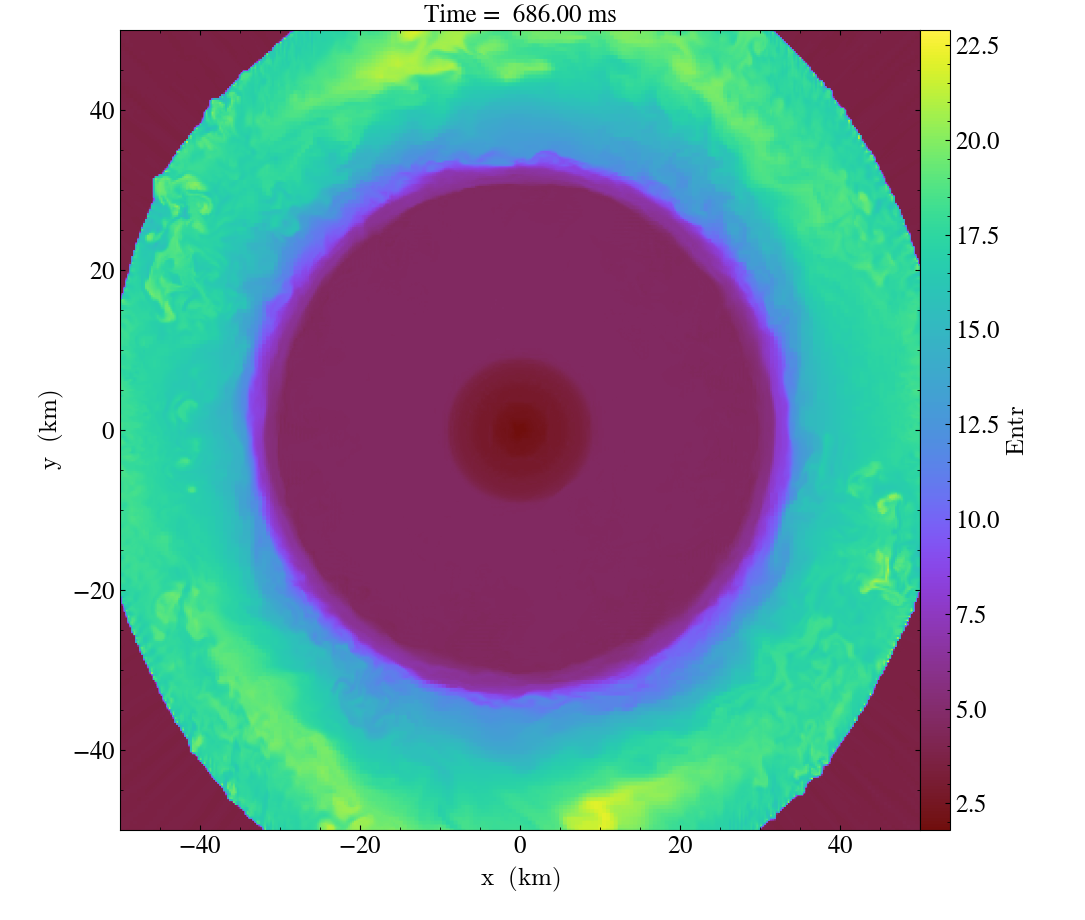

In [21]:
# use `roi_condition` to exclude regions that are not of interest
roi_condition = "obj[('gas', 'density')] > 5.0e14"

gamer_obj.plot_slice(fnidx, "Entr", "z", logscale = False, zoom = 200, roi_condition = roi_condition,
                     fnout_prefix = "SlicePlot_Roi")
Image(filename = "SlicePlot_Roi_Entr_z_000124.png", width = 400, height = 400)

### advanced techniques

Processing /home/hfhsieh/nas/ccsn_leakage_prod/B00_Rot00/MHM_AngMax00_AngMin12_B0_Rot0_re4/Data_000124
Update zoom factor to 144


yt : [INFO     ] 2025-04-22 07:52:43,865 Parameters: current_time              = 686.0
yt : [INFO     ] 2025-04-22 07:52:43,866 Parameters: domain_dimensions         = [160 160 160]
yt : [INFO     ] 2025-04-22 07:52:43,866 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-04-22 07:52:43,867 Parameters: domain_right_edge         = [20000. 20000. 20000.]
yt : [INFO     ] 2025-04-22 07:52:43,867 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-04-22 07:52:47,323 xlim = 9930.555556 10069.444444
yt : [INFO     ] 2025-04-22 07:52:47,324 ylim = 9930.555556 10069.444444
yt : [INFO     ] 2025-04-22 07:52:47,326 xlim = 9930.555556 10069.444444
yt : [INFO     ] 2025-04-22 07:52:47,326 ylim = 9930.555556 10069.444444
yt : [INFO     ] 2025-04-22 07:52:47,328 Making a fixed resolution buffer of (('gamer', 'Entr')) 800 by 800
yt : [INFO     ] 2025-04-22 07:52:47,626 Saving plot ./SlicePlot_ZoomAuto_Entr_z_000124.png


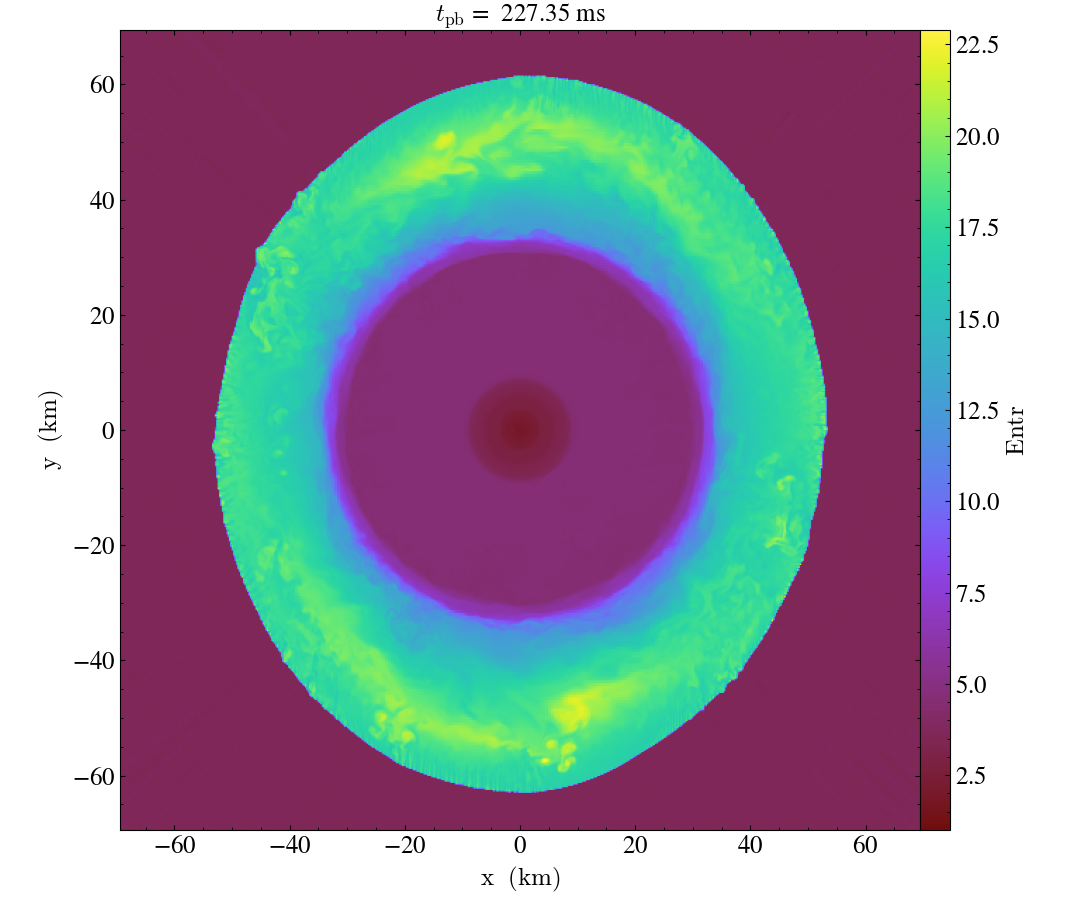

In [22]:
# set `tbounce` to "auto" for displaying the title in postbounce
# enable `zoom_auto` to tune the zoom factor based on the maximum shock radius
zoom_auto = True
fnout_prefix = "SlicePlot_ZoomAuto"

gamer_obj.plot_slice(fnidx, "Entr", "z", logscale = False, zoom = 200, lim = (1, None), tbounce = "auto",
                     zoom_auto = zoom_auto, fnout_prefix = fnout_prefix)
Image(filename = "SlicePlot_ZoomAuto_Entr_z_000124.png", width = 400, height = 400)

## plot_densfluct()

In [23]:
gamer_obj.plot_densfluct?

Signature:
gamer_obj.plot_densfluct(
    fn_list,
    radius,
    center='pns_ascii',
    tbounce=None,
    tstart='bounce',
    resolution=1024,
    nbin=128,
    vlim=None,
    fnout_prefix='SlicePlot_DensFluct',
    path_fnout='.',
)
Docstring:
Create a slice plot of density fluctuation for the CCSN simulations.

Parameters
----------
fn_list: array-like of integer/string
    Path to HDF5 snapshots or their indices to be processed.
    --> Can be "Data_000010", "10", or 10.
        Use "all" to automatically retrieve all available HDF5 files.
radius: float
    Half-width of the domain, in cm.
center: string or array-like of float, optional
    Coordinate of reference center, in cm.
    --> "c"        : center of the simulation domain.
        "pns_ascii": PNS center recorded in Record__CentralQuant
        "pns_hdf5" : coordinate of highest-density cell in the HDF5 snapshot.
tbounce: float, optional
    Physical time of core bounce, in second. Use to control the figure title.
tstart

In [24]:
# use the simulation data of a rotating model
rundir  = "/home/hfhsieh/nas/ccsn_leakage_prod/B10_Rot10/MHM_AngMax00_AngMin12_B10_Rot10_re3"
tbounce = 4.6881000e-01

gamer_obj = gamervis(rundir, tbounce)

radius = 2e7
fnlist = 108

gamer_obj.plot_densfluct(fnlist, radius, tbounce = "auto")

Processing /home/hfhsieh/nas/ccsn_leakage_prod/B10_Rot10/MHM_AngMax00_AngMin12_B10_Rot10_re3/Data_000108


yt : [INFO     ] 2025-04-22 07:52:49,183 Parameters: current_time              = 664.0
yt : [INFO     ] 2025-04-22 07:52:49,184 Parameters: domain_dimensions         = [160 160 160]
yt : [INFO     ] 2025-04-22 07:52:49,185 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-04-22 07:52:49,185 Parameters: domain_right_edge         = [20000. 20000. 20000.]
yt : [INFO     ] 2025-04-22 07:52:49,186 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-04-22 07:52:49,191 Making a fixed resolution buffer of (x) 1024 by 1024
yt : [INFO     ] 2025-04-22 07:52:58,924 Making a fixed resolution buffer of (y) 1024 by 1024
yt : [INFO     ] 2025-04-22 07:52:59,031 Making a fixed resolution buffer of (density) 1024 by 1024


Save figure to ./SlicePlot_DensFluct_000108.png


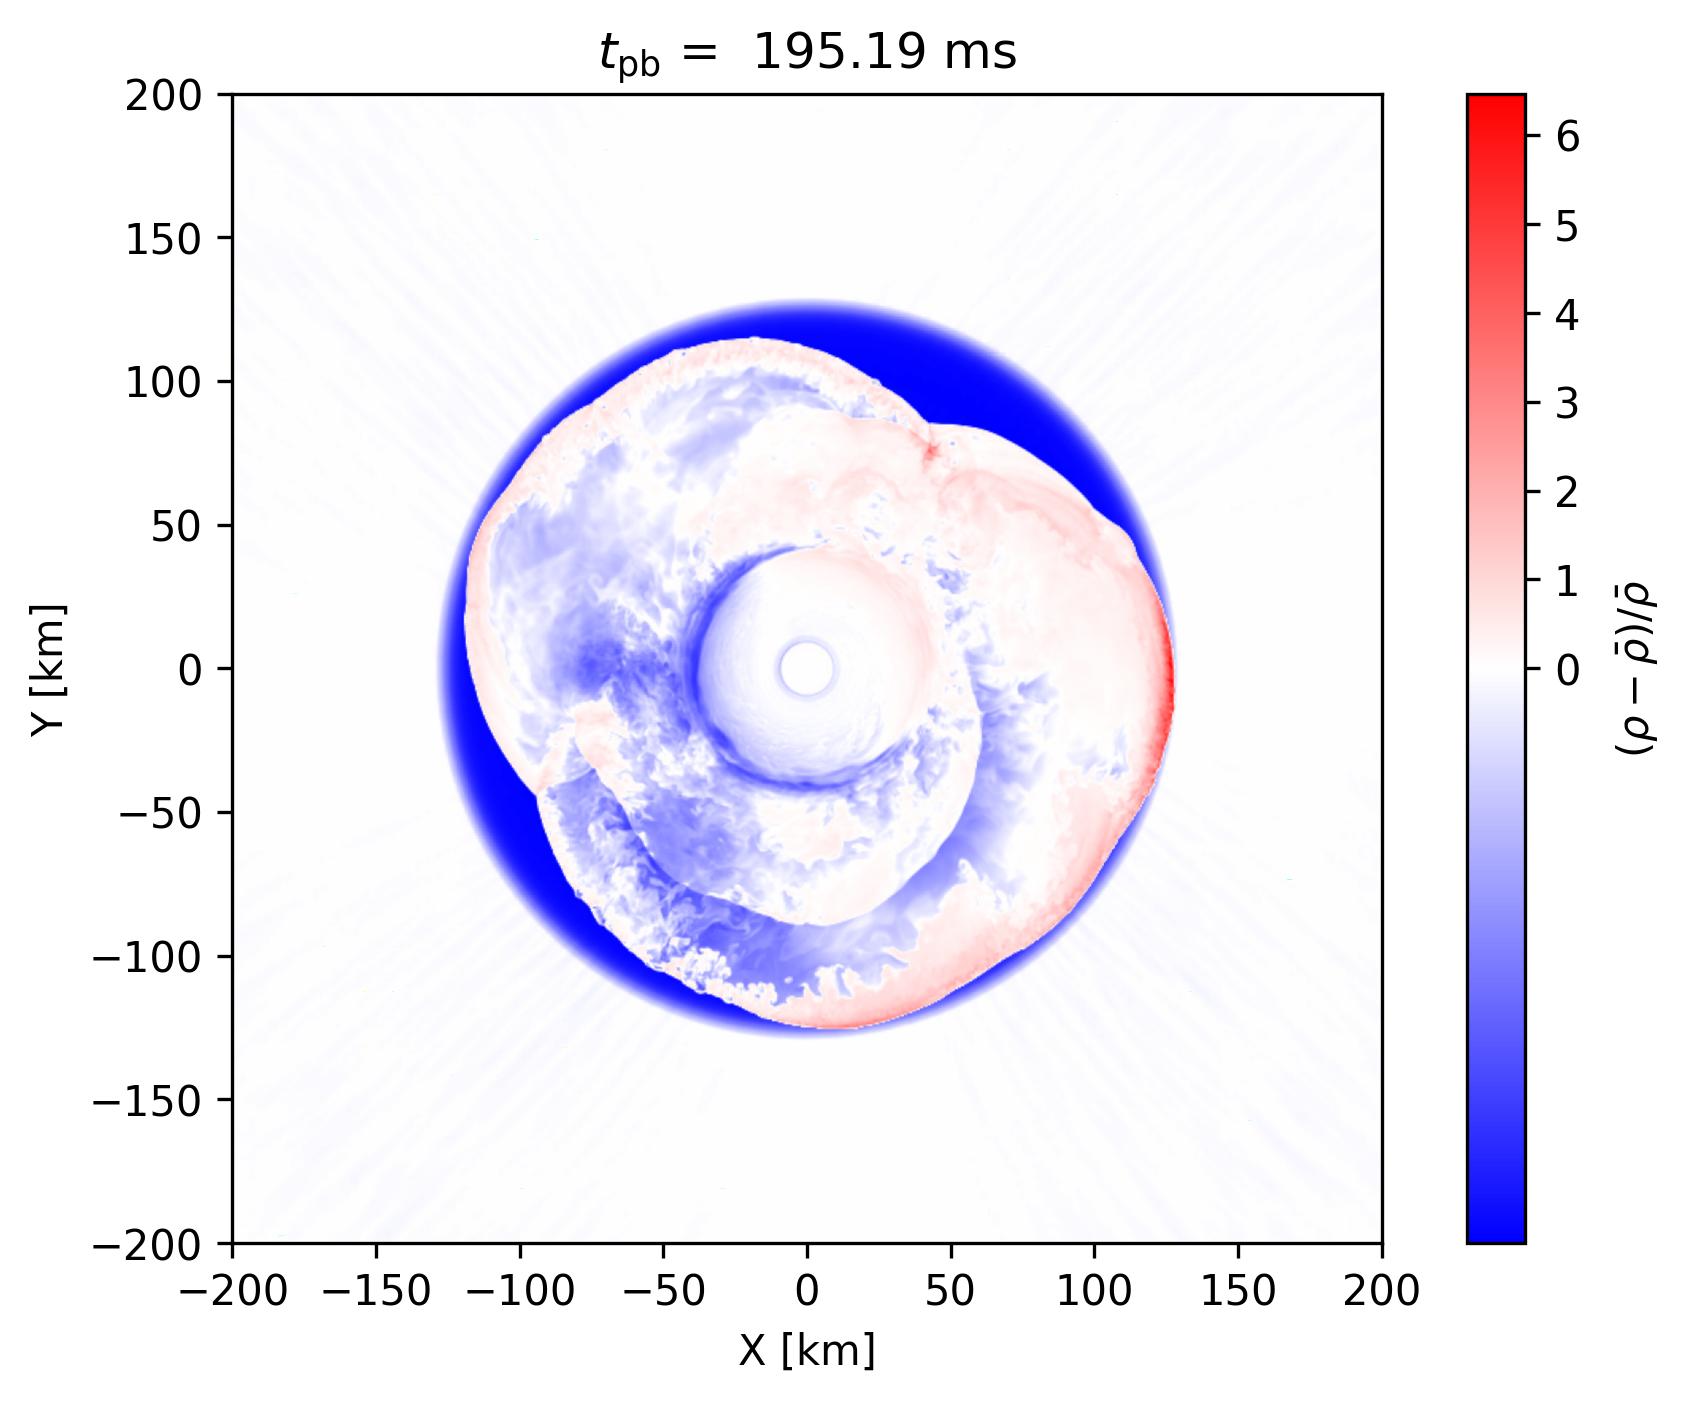

In [25]:
Image(filename = "SlicePlot_DensFluct_000108.png", width = 400, height = 400)